In [8]:
from pytorch_transformers import GPT2Tokenizer
from experiment import Intervention, Model
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [9]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = Model(output_attentions=True)

In [10]:
# Test experiment
base_sentence = "The doctor asked the nurse a question. {}"
intervention = Intervention(
        tokenizer,
        base_sentence,
        ["He", "She"],
        ["asked", "answered"])
candidate1_base_prob, candidate2_base_prob, candidate1_probs, candidate2_probs = model.attention_intervention_experiment(intervention)

100%|██████████| 12/12 [00:09<00:00,  1.27it/s]


#### Results
In each heatmap, rows correspond to layers and columns to heads. Each cell contains the odds ratio for the intervention of overriding the corresponding layer/head.

Intervention: replace attention M(x) with M(x') for a specific layer/head
x : The doctor asked the nurse a question. He
x': The doctor asked the nurse a question. She
Continuations compared: asked / answered
Odds ratio: (p("answered"|M(x')) / p("asked"|M(x')) / (p("answered") / p("asked"))


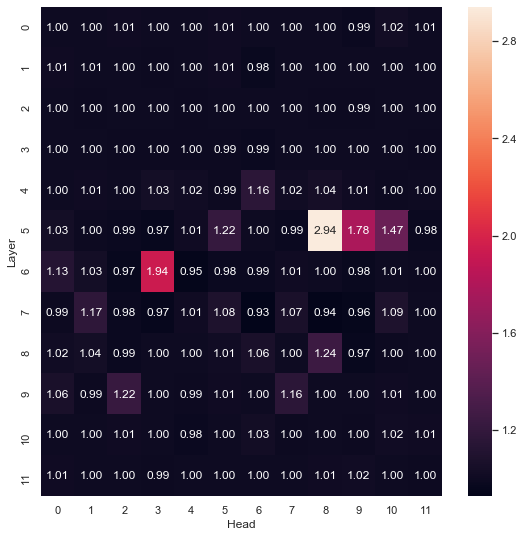

In [11]:
candidate1 = intervention.candidates[0][1:]
candidate2 = intervention.candidates[1][1:]

odds_base = candidate2_base_prob / candidate1_base_prob
odds_intervention = candidate2_probs / candidate1_probs
odds_ratio = odds_intervention / odds_base


print("Intervention: replace attention M(x) with M(x') for a specific layer/head")
print(f"x : {intervention.base_strings[0]}")
print(f"x': {intervention.base_strings[1]}")
print(f"Continuations compared: {candidate1} / {candidate2}")
print(f'Odds ratio: (p("{candidate2}"|M(x\')) / p("{candidate1}"|M(x\')) / (p("{candidate2}") / p("{candidate1}"))')

visualize = True
if visualize:
    plt.figure(figsize=(9,9)) 
    ax = sns.heatmap(odds_ratio, annot=True, annot_kws={"size": 12}, fmt=".2f")
    # ax.set_title("Attention Intervention Odds Ratio")
    ax.set(xlabel='Head', ylabel='Layer')
else:
    torch.set_printoptions(precision=1, sci_mode=False)
    print(odds_ratio)
